In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Using Singular Value Decomposition
[wikipedia link](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [37]:
# numpy svg example case:

# the numpy doc string says: "the V here is V.H. and the s here is only the diagnal terms"
example_data = np.random.multivariate_normal([1, 1.2], [[0.4, 1], [0.025, 0.2]], size=10000)

U, s, V = np.linalg.svd(example_data)

mat_sigma = np.zeros((10000, 2))
mat_sigma[:2, :2] = np.diag(s)
recovered = U.dot(mat_sigma).dot(V)

np.allclose(example_data, recovered)

True

<IPython.core.display.Javascript object>


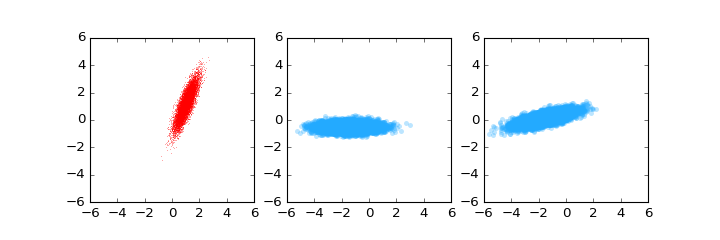

In [3]:
fig = plt.figure(figsize=(9, 3))
ax1 = fig.add_subplot(131, aspect="equal")
ax2 = fig.add_subplot(132, aspect="equal")
ax3 = fig.add_subplot(133, aspect="equal")

In [47]:
data = np.random.multivariate_normal([1, 1.2], [[0.4, 1], [0.025, 0.2]], size=10000)
ax1.clear()
ax1.scatter(data[:, 0], data[:, 1], s=0.5, lw='0', color="red", alpha="0.4")
ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)

# now we can try to find the principle components
# First method: using eigenvalue decomposition of the covariance matrix X^T X
centered = data - data.mean(axis=0)
mat_cov = np.dot(centered.T, centered)
val, vec = np.linalg.eig(mat_cov)


T = data.dot(vec)

ax2.clear()
ax2.scatter(T[:, 1], 
            T[:, 0], lw='0', color="#23aaff", alpha="0.3")
ax2.set_xlim(-6, 6)
ax2.set_ylim(-6, 6);

In [48]:
# Now try to chose k
retained_variance = 1 - s[:1].sum() / s.sum()
print("the variation that is loss is only {}!!".format(retained_variance))

the variation that is loss is only 0.16167191596818664!!
